# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [1]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [2]:
# Reading in csv
accident_data_df = pd.read_csv("Cleaned_Accident_Data.csv")
accident_data_df["Make"].value_counts()

Make
Cessna           21240
Piper            11559
Beech             4306
Bell              1335
Boeing            1216
                 ...  
Gates learjet       55
Ercoupe             54
Let                 53
Gulfstream          52
Canadair            50
Name: count, Length: 65, dtype: int64

## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [3]:
#Dividing planes into less than 20 passengers and greater than and equal to 20
large_plane_df = accident_data_df[accident_data_df["Total.Passengers"] >= 20]
small_plane_df = accident_data_df[accident_data_df["Total.Passengers"] < 20]

In [4]:
# Checking value counts
small_plane_df["Make"].value_counts()

Make
Cessna               21179
Piper                11531
Beech                 4254
Bell                  1325
Mooney                1029
                     ...  
Gulfstream              50
British aerospace       37
Canadair                35
Bombardier              19
Airbus                  17
Name: count, Length: 65, dtype: int64

In [5]:
# Checking value counts
large_plane_df["Make"].value_counts()

Make
Boeing                       694
Mcdonnell douglas            256
Airbus                       117
Embraer                       67
Cessna                        61
Bombardier                    57
Beech                         52
De havilland                  38
Lockheed                      29
Piper                         28
Aerospatiale                  20
British aerospace             18
Canadair                      15
Fairchild                     13
Bell                          10
Grumman                        6
Swearingen                     6
Mitsubishi                     3
Sikorsky                       3
Learjet                        3
Aero commander                 3
Let                            2
Gulfstream                     2
Eurocopter                     2
Rockwell                       2
Gates learjet                  1
North american                 1
Raytheon aircraft company      1
Mooney                         1
Name: count, dtype: int64

In [6]:
# Removing Makes with fewer than 10 entries for lack of data in large set
value_counts_large = large_plane_df["Make"].value_counts()
restricted_value_counts_large = value_counts_large>=10
restricted_value_counts_large = restricted_value_counts_large[restricted_value_counts_large == False]
drop_list_large = restricted_value_counts_large.index

large_plane_df_cut = large_plane_df[~large_plane_df["Make"].isin(drop_list_large)]

In [7]:
# Rechecking large data
large_plane_df_cut["Make"].value_counts()

Make
Boeing               694
Mcdonnell douglas    256
Airbus               117
Embraer               67
Cessna                61
Bombardier            57
Beech                 52
De havilland          38
Lockheed              29
Piper                 28
Aerospatiale          20
British aerospace     18
Canadair              15
Fairchild             13
Bell                  10
Name: count, dtype: int64

#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

In [8]:
# Grouping large and small planes data by make
large_plane_grouped = large_plane_df_cut.groupby("Make")["Fatality/Serious Injury Ratio"].mean()
small_plane_grouped = small_plane_df.groupby("Make")["Fatality/Serious Injury Ratio"].mean()

# Sorting by ascending injury fraction
sorted_large = large_plane_grouped.sort_values(ascending=True)
sorted_small = small_plane_grouped.sort_values(ascending=True)

In [9]:
# Separating out the lowest 15 in fatality/serious injury ratio for each category to a series and converting each to a DF for graphing
low_15_large = sorted_large.head(15)
low_15_large_df = low_15_large.to_frame()
low_15_small = sorted_small.head(15)
low_15_small_df = low_15_small.to_frame()

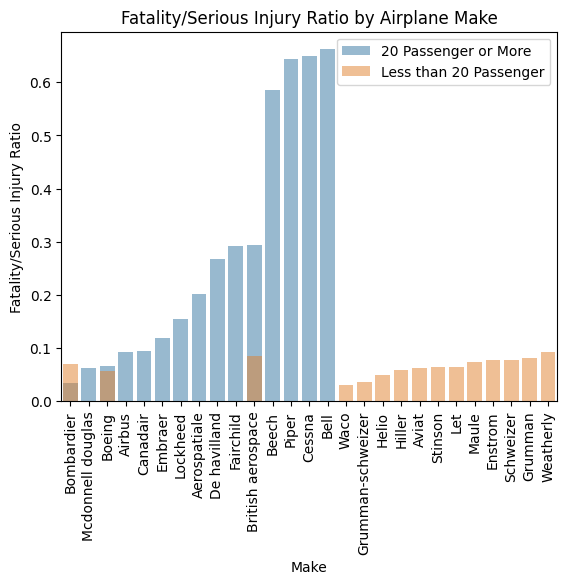

In [10]:
# Creating a bar plot grouped by airplane make and graphing both large and small on the same graph
ax1 = sns.barplot(low_15_large_df, x="Make", y="Fatality/Serious Injury Ratio", alpha =0.5, label = "20 Passenger or More")
ax2 = sns.barplot(low_15_small_df, x="Make", y="Fatality/Serious Injury Ratio", alpha =0.5, label = "Less than 20 Passenger")

# Rotating x-labels for ease of reading
ax1.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=90)

plt.title("Fatality/Serious Injury Ratio by Airplane Make")
plt.show()

**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

In [11]:
# Separating out the lowest 10 small aircraft fatality/serious injury ratio to a series and converting each to a DF for graphing
low_10_small = sorted_small.head(10)
low_10_small_names = low_10_small.index

low_10_small_df = small_plane_df[small_plane_df["Make"].isin(low_10_small_names)]

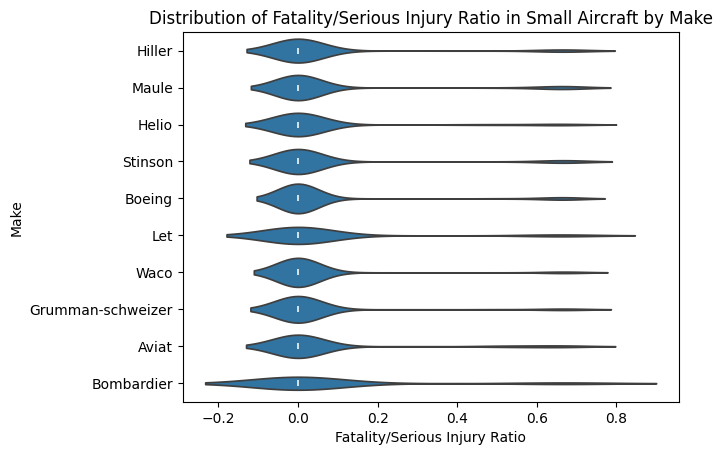

In [12]:
# Violin plot of lowest 10 small aircraft fatality/serious injury ratio
ax=sns.violinplot(low_10_small_df, y="Make", x="Fatality/Serious Injury Ratio")

plt.title("Distribution of Fatality/Serious Injury Ratio in Small Aircraft by Make")
plt.show()

**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

In [13]:
# Separating out the lowest 10 small aircraft fatality/serious injury ratio to a series and converting each to a DF for graphing
low_10_large = sorted_large.head(10)
low_10_large_names = low_10_large.index

low_10_large_df = large_plane_df_cut[large_plane_df_cut["Make"].isin(low_10_large_names)]

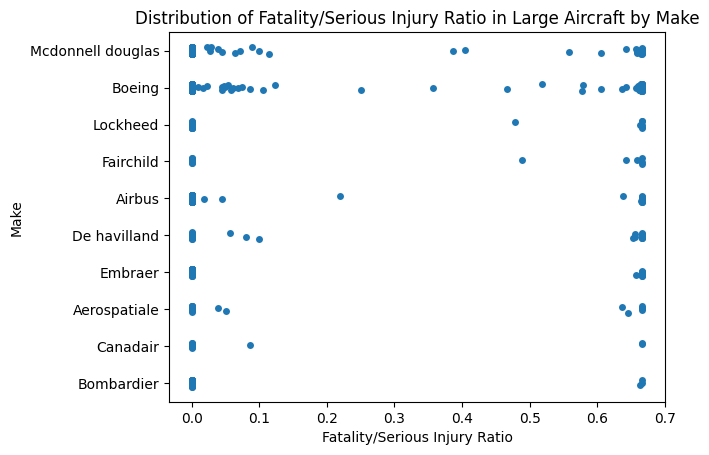

In [14]:
# Strip plot of lowest 10 small aircraft fatality/serious injury ratio
ax=sns.stripplot(low_10_large_df, y="Make", x="Fatality/Serious Injury Ratio")

plt.title("Distribution of Fatality/Serious Injury Ratio in Large Aircraft by Make")
plt.show()

**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

In [15]:
# Grouping large and small planes data by make
large_plane_destruction = large_plane_df_cut.groupby("Make")["Aircraft Destroyed?"].mean()
small_plane_destruction = small_plane_df.groupby("Make")["Aircraft Destroyed?"].mean()

# Sorting by ascending destruction fraction
sorted_large_destruction = large_plane_destruction.sort_values(ascending=True)
sorted_small_destruction = small_plane_destruction.sort_values(ascending=True)

# Separating out the lowest 15 in Aircraft distruction ratio for each category to a series and converting each to a DF for graphing
low_15_large_destruction = sorted_large_destruction.head(15)
low_15_large_df_destruction = low_15_large_destruction.to_frame()
low_15_small_destruction = sorted_small_destruction.head(15)
low_15_small_df_destruction = low_15_small_destruction.to_frame()

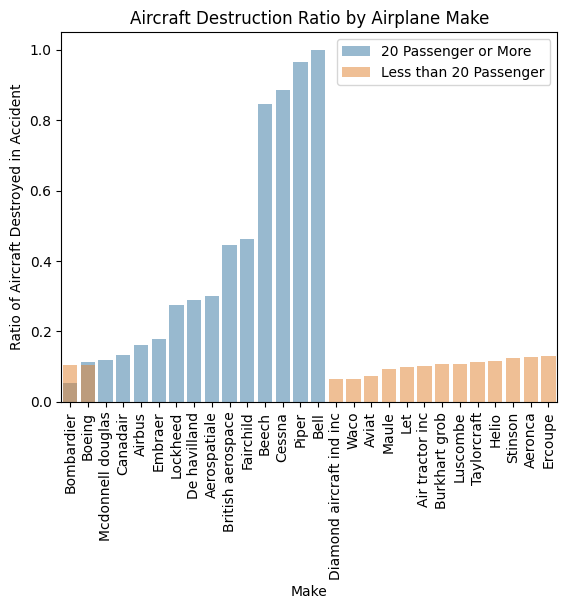

In [16]:
# Creating a bar plot grouped by airplane make and graphing both large and small on the same graph
ax1 = sns.barplot(low_15_large_df_destruction, x="Make", y="Aircraft Destroyed?", alpha =0.5, label = "20 Passenger or More")
ax2 = sns.barplot(low_15_small_df_destruction, x="Make", y="Aircraft Destroyed?", alpha =0.5, label = "Less than 20 Passenger")

# Rotating x-labels for ease of reading
ax1.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=90)

plt.ylabel("Ratio of Aircraft Destroyed in Accident")
plt.title("Aircraft Destruction Ratio by Airplane Make")
plt.show()

#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

In [17]:
#Large Craft injury best
sorted_large.head(5)

Make
Bombardier           0.035017
Mcdonnell douglas    0.061865
Boeing               0.067389
Airbus               0.093277
Canadair             0.094686
Name: Fatality/Serious Injury Ratio, dtype: float64

In [18]:
#Large Craft plane survival best
sorted_large_destruction.head(5)

Make
Bombardier           0.052632
Boeing               0.112392
Mcdonnell douglas    0.117188
Canadair             0.133333
Airbus               0.162393
Name: Aircraft Destroyed?, dtype: float64

In [19]:
#Large Craft injury best
sorted_small.head(5)

Make
Waco                 0.031153
Grumman-schweizer    0.037217
Helio                0.048771
Boeing               0.056351
Hiller               0.058190
Name: Fatality/Serious Injury Ratio, dtype: float64

In [20]:
#Large Craft plane survival best
sorted_small_destruction.head(5)

Make
Diamond aircraft ind inc    0.063492
Waco                        0.065421
Aviat                       0.073684
Maule                       0.092664
Let                         0.098039
Name: Aircraft Destroyed?, dtype: float64

In [72]:
"""
Conclusions on Make data

Among aircraft carrying 20 passengers or more Bombardier and Boeing took the 1 and 2 spots in both passenger safety/survival
in a crash and the likelihood of the craft surviving as well. However, this is based on less than 100 examples for Bombardier and over 1000 for Boeing.
This leads to the conclusion that the statistics are more solid for Boeing as the lead choice in the large aircraft category, With MacDonnel Douglas as
a close second.

Among craft with fewer than 20 passengers, the results are less clear. Unlike the large craft where three of the top five in each category were
from the largest represented makes, the more common small craft makes are not in the top 5 in either passenger or plane survival. Raven and Waco make 
the top three in each category, but due to the smaller statistical sample, further research is necessary for a conclusion. This is possibly due to the
larger variation in models among small craft
"""

'\nConclusions on Make data\n\nAmong aircraft carrying 20 passengers or more Bombardier and Boeing took the 1 and 2 spots in both passenger safety/survival\nin a crash and the likelihood of the craft surviving as well. However, this is based on less than 100 examples for Bombardier and over 1000 for Boeing.\nThis leads to the conclusion that the statistics are more solid for Boeing as the lead choice in the large aircraft category.\n\nAmong craft with fewer than 20 passengers, the results are less clear. Unlike the large craft where three of the top five in each category were\nfrom the largest represented makes, the more common small craft makes are not in the top 5 in either passenger or plane survival. Raven and Waco make \nthe top three in each category, but due to the smaller statistical sample, further research is necessary for a conclusion. This is possibly due to the\nlarger variation in models among small craft\n'

### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

In [21]:
# Removing Makes with fewer than 10 model entries for lack of data
model_counts_large = large_plane_df["Make - Model"].value_counts()
restricted_model_counts_large = model_counts_large>=10
restricted_model_counts_large = restricted_model_counts_large[restricted_model_counts_large == False]
drop_model_large = restricted_model_counts_large.index

large_model_df = large_plane_df[~large_plane_df["Make - Model"].isin(drop_model_large)]

In [22]:
# Grouping large planes by model
large_models_grouped = large_model_df.groupby("Make - Model")["Fatality/Serious Injury Ratio"].mean()

# Sorting by ascending injury fraction
large_models = large_models_grouped.sort_values(ascending=True)
large_models_df = large_models.to_frame()

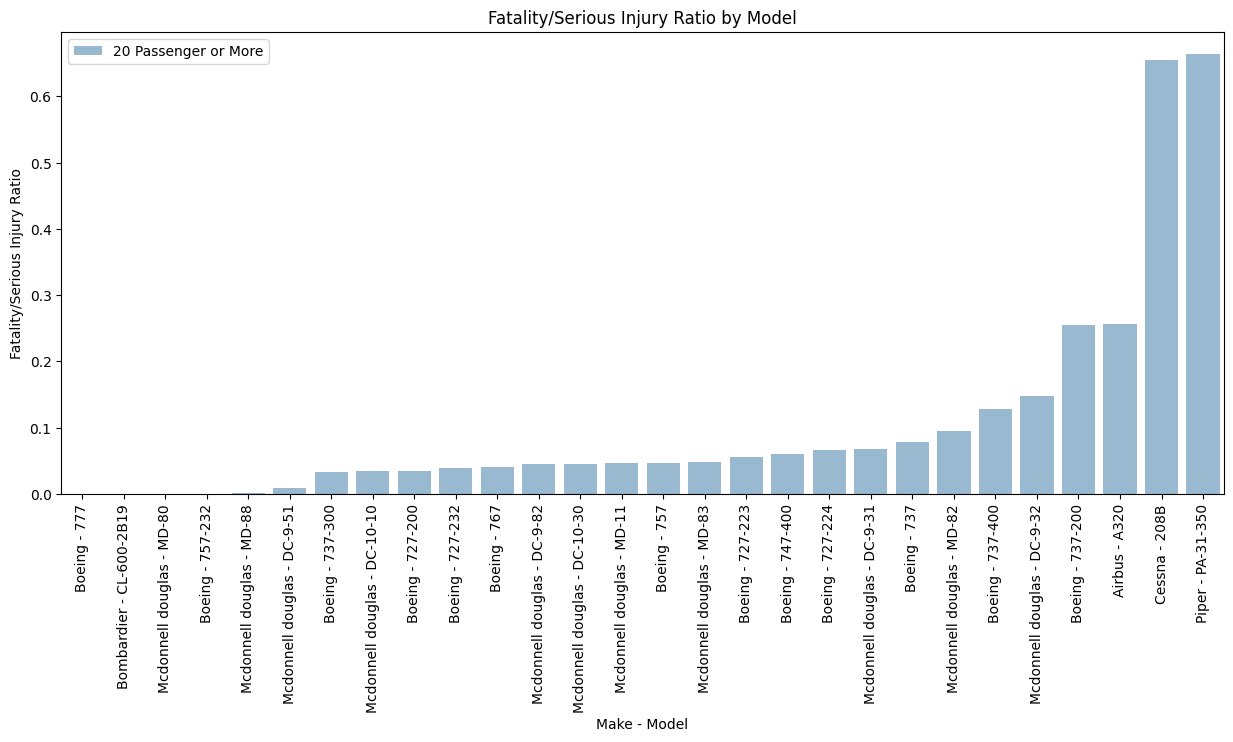

In [23]:
# Setting figure size
plt.figure(figsize=(15,6))
# Creating a bar plot grouped by large airplane model and graphing
ax_large = sns.barplot(large_models_df, x="Make - Model", y="Fatality/Serious Injury Ratio", alpha =0.5, label = "20 Passenger or More")

# Rotating x-labels for ease of reading
ax_large.tick_params(axis='x', rotation=90)

plt.title("Fatality/Serious Injury Ratio by Model")
plt.show()

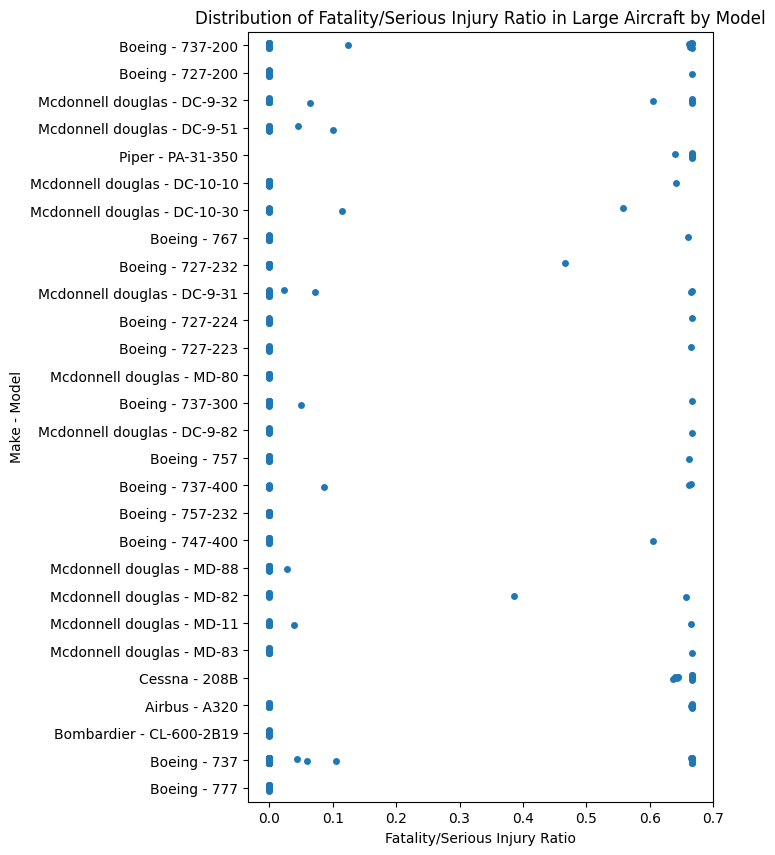

In [24]:
# Strip plot of large aircraft fatality/serious injury ratio by model
plt.figure(figsize=(6,10))

ax=sns.stripplot(large_model_df, y="Make - Model", x="Fatality/Serious Injury Ratio")


plt.title("Distribution of Fatality/Serious Injury Ratio in Large Aircraft by Model")
plt.show()

**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

In [25]:
# Removing Makes with fewer than 100 model entries for lack of statistical significance
model_counts_small = small_plane_df["Make - Model"].value_counts()
restricted_model_counts_small = model_counts_small>=50
restricted_model_counts_small = restricted_model_counts_small[restricted_model_counts_small == False]
drop_model_small = restricted_model_counts_small.index

small_model_df = small_plane_df[~small_plane_df["Make - Model"].isin(drop_model_small)]

In [26]:
# Grouping small planes data by model
small_model_grouped = small_model_df.groupby("Make - Model")["Fatality/Serious Injury Ratio"].mean()

# Sorting by ascending injury fraction
sorted_small_model = small_model_grouped.sort_values(ascending=True)

In [27]:
# Separating out the lowest 15 in fatality/serious injury ratio for each category to a series and converting each to a DF for graphing
low_model_small = sorted_small_model.head(10)
low_model_small_df = low_model_small.to_frame()

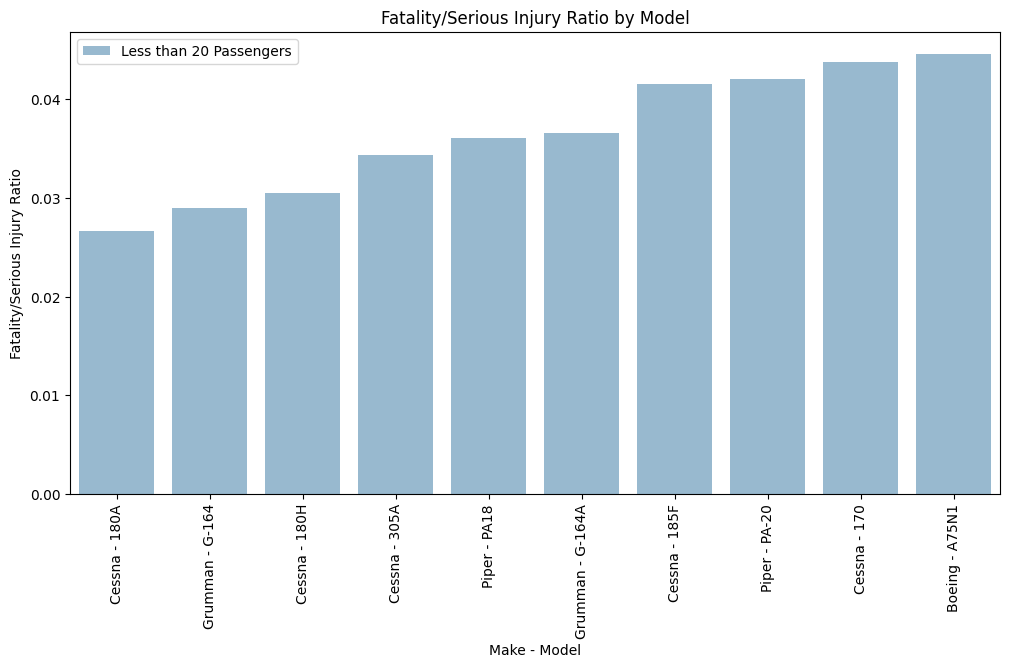

In [28]:
# Setting figure size
plt.figure(figsize=(12,6))
# Creating a bar plot grouped by large airplane model and graphing
ax_small = sns.barplot(low_model_small_df, x="Make - Model", y="Fatality/Serious Injury Ratio", alpha =0.5, label = "Less than 20 Passengers")

# Rotating x-labels for ease of reading
ax_small.tick_params(axis='x', rotation=90)

plt.title("Fatality/Serious Injury Ratio by Model")
plt.show()

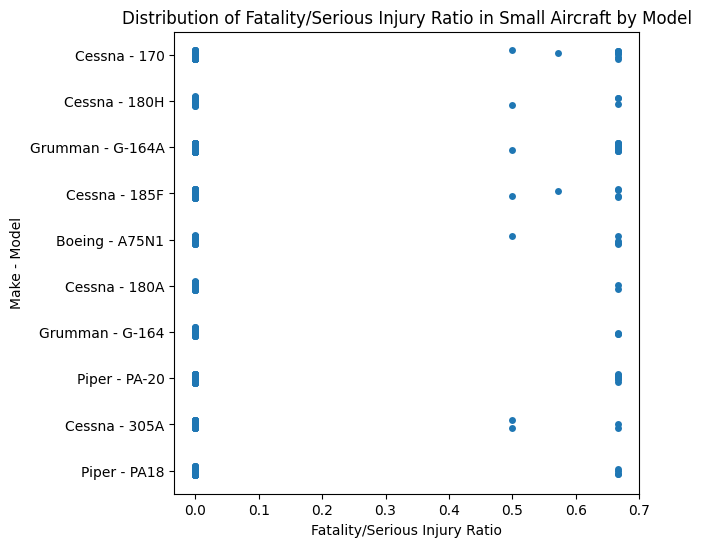

In [29]:
# Strip plot of small aircraft fatality/serious injury ratio by model

# Filtering to 10 best
small_10_best = low_model_small.index
small_model_10 = small_model_df[small_model_df["Make - Model"].isin(small_10_best)]

plt.figure(figsize=(6,6))

ax=sns.stripplot(small_model_10, y="Make - Model", x="Fatality/Serious Injury Ratio")


plt.title("Distribution of Fatality/Serious Injury Ratio in Small Aircraft by Model")
plt.show()

### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

In [ ]:
"""
Conclusions for Model Data

For large aircraft, the model data supports what was found in analysis of the various Makes. Boeing leads the way, with 5 of the lowest 10 models
in Fatal/Serious injury Ratio. This data comes from a minimum of 10 occurances in the data for the Model listed. McDonnel Douglas is a close second
with 4 of the 5 lowest.

As expected given the large data variation for small planes, the models represented when filtering for statistical significance (50 incidents in the
case of small aircraft data due to the larger data set). Cesna comes out on top with five of the 10 best. All with less than a 5% fatal/serious injury
percentage in crashes.

"""

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.

In [30]:
## Looking at Phase of Flight
phase_of_flight = accident_data_df

In [31]:
phase_of_flight["Broad.phase.of.flight"].value_counts()

Broad.phase.of.flight
Landing        11516
Takeoff         7641
Cruise          6473
Maneuvering     4694
Approach        3786
Taxi            1376
Climb           1201
Descent         1125
Go-around        884
Standing         516
Unknown          357
Other             66
Name: count, dtype: int64

In [32]:
# Replacing other and unknown with nan and dropping nan
phase_of_flight["Broad.phase.of.flight"] = phase_of_flight["Broad.phase.of.flight"].replace({"Unknown":np.nan})
phase_of_flight["Broad.phase.of.flight"] = phase_of_flight["Broad.phase.of.flight"].replace({"Other":np.nan})

phase_of_flight.dropna(subset=["Broad.phase.of.flight"], inplace=True)

In [33]:
# Recheck phase of flight
phase_of_flight["Broad.phase.of.flight"].value_counts()

Broad.phase.of.flight
Landing        11516
Takeoff         7641
Cruise          6473
Maneuvering     4694
Approach        3786
Taxi            1376
Climb           1201
Descent         1125
Go-around        884
Standing         516
Name: count, dtype: int64

In [35]:
# Grouping by phase of flight for injury
group_by_phase = phase_of_flight.groupby("Broad.phase.of.flight")["Fatality/Serious Injury Ratio"].mean()
group_by_phase_df = group_by_phase.to_frame()

In [36]:
# Checking phase df
group_by_phase_df.head(10)

,Fatality/Serious Injury Ratio
Broad.phase.of.flight,
Approach,0.190982
Climb,0.256548
Cruise,0.215736
Descent,0.209827
Go-around,0.164870
Landing,0.010800
Maneuvering,0.288845
Standing,0.038010
Takeoff,0.106085


In [37]:
# Grouping by phase of flight for airplane destruction
group_by_phase2 = phase_of_flight.groupby("Broad.phase.of.flight")["Aircraft Destroyed?"].mean()
group_by_phase_df2 = group_by_phase2.to_frame()

In [38]:
# Checking phase df
group_by_phase_df2.head(10)

,Aircraft Destroyed?
Broad.phase.of.flight,
Approach,0.294506
Climb,0.427144
Cruise,0.350224
Descent,0.332444
Go-around,0.290724
Landing,0.034908
Maneuvering,0.439497
Standing,0.135659
Takeoff,0.202199


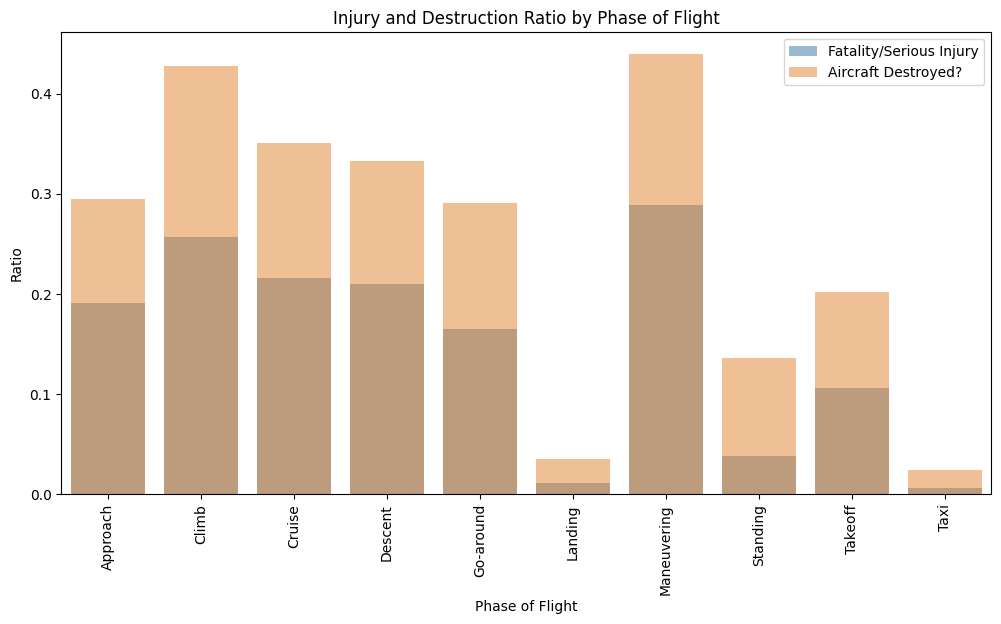

In [162]:
# Creating a bar plot for injury and destruction ratios for phase of flight

# Setting figure size and data sets
plt.figure(figsize=(12,6))

ax_injury = sns.barplot(group_by_phase_df, x="Broad.phase.of.flight", y="Fatality/Serious Injury Ratio", alpha = 0.5, label = "Fatality/Serious Injury")
ax_destruction = sns.barplot(group_by_phase_df2, x="Broad.phase.of.flight", y="Aircraft Destroyed?", alpha = 0.5, label = "Aircraft Destroyed?")

# Rotating x-labels for ease of reading
ax_injury.tick_params(axis='x', rotation=90)

plt.ylabel("Ratio")
plt.xlabel("Phase of Flight")
plt.title("Injury and Destruction Ratio by Phase of Flight")
plt.show()

In [ ]:
"""
Conclusions for Phase of flight

Despite Landing and takeoff having the largest number of accidents reported, the highest for both injury ratio and aircraft damage 
occured during maneuvering. This phase of flight had a 29% injury rate and 44% rate of aircraft destruction.

"""

In [ ]:
## Looking at engine type

In [39]:
engine_type = accident_data_df

In [40]:
engine_type["Engine.Type"].value_counts()

Engine.Type
Reciprocating    34817
Turbo Prop        1527
Turbo Shaft       1498
Turbo Fan          834
Turbo Jet          301
Unknown            201
Name: count, dtype: int64

In [41]:
# Replacing unknown with nan and dropping nan
engine_type["Engine.Type"] = phase_of_flight["Engine.Type"].replace({"Unknown":np.nan})

engine_type.dropna(subset=["Engine.Type"], inplace=True)

In [42]:
# Recheck
engine_type["Engine.Type"].value_counts()

Engine.Type
Reciprocating    34817
Turbo Prop        1527
Turbo Shaft       1498
Turbo Fan          834
Turbo Jet          301
Name: count, dtype: int64

In [43]:
# Grouping by phase of flight for injury
group_by_engine = engine_type.groupby("Engine.Type")["Fatality/Serious Injury Ratio"].mean()
group_by_engine_df = group_by_engine.to_frame()

In [44]:
# Checking phase df
group_by_engine_df.head()

,Fatality/Serious Injury Ratio
Engine.Type,
Reciprocating,0.130380
Turbo Fan,0.049121
Turbo Jet,0.118323
Turbo Prop,0.171266
Turbo Shaft,0.153882


In [45]:
# Grouping by phase of flight for airplane destruction
group_by_engine2 = engine_type.groupby("Engine.Type")["Aircraft Destroyed?"].mean()
group_by_engine_df2 = group_by_engine2.to_frame()

In [46]:
# Checking phase df
group_by_engine_df2.head()

,Aircraft Destroyed?
Engine.Type,
Reciprocating,0.218629
Turbo Fan,0.095923
Turbo Jet,0.212625
Turbo Prop,0.289456
Turbo Shaft,0.276368


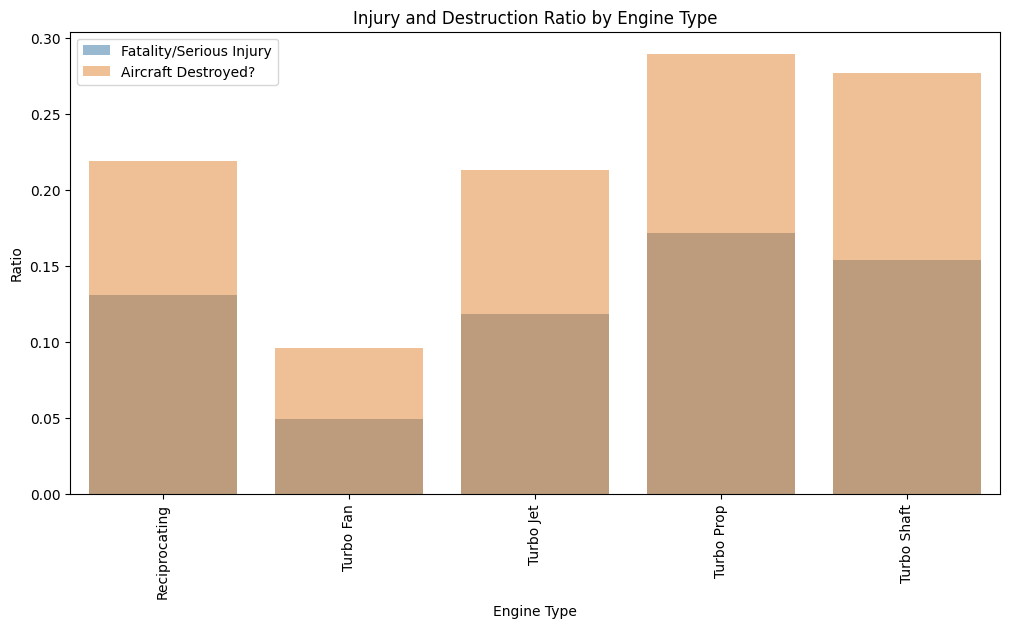

In [47]:
# Creating a bar plot for injury and destruction ratios for engine type

# Setting figure size and data sets
plt.figure(figsize=(12,6))

ax_injury2 = sns.barplot(group_by_engine_df, x="Engine.Type", y="Fatality/Serious Injury Ratio", alpha = 0.5, label = "Fatality/Serious Injury")
ax_destruction2 = sns.barplot(group_by_engine_df2, x="Engine.Type", y="Aircraft Destroyed?", alpha = 0.5, label = "Aircraft Destroyed?")

# Rotating x-labels for ease of reading
ax_injury2.tick_params(axis='x', rotation=90)

plt.ylabel("Ratio")
plt.xlabel("Engine Type")
plt.title("Injury and Destruction Ratio by Engine Type")
plt.show()

In [ ]:
"""
Conclusions for Engine Type

Those listed as Reciprocating type engine had the highest representation among the crash data, however, Turbo Prop planes showed the worst rate
of injury at roughly 17% and aircraft destruction at 29%.

"""